In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx 
import numpy as np
from PIL import Image
import fast_tsp as tsp

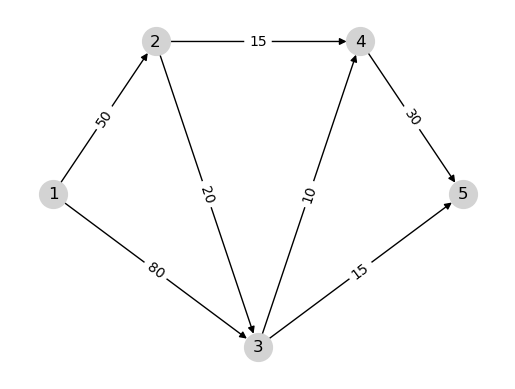

In [2]:
weighted_elist=[(1,2,50),(1,3,80),(2,3,20),(2,4,15),(3,4,10),(3,5,15),(4,5,30)]
P={1:(0,1),2:(1,2),3:(2,0),4:(3,2),5:(4,1)}
G=nx.DiGraph()
G.add_weighted_edges_from(weighted_elist)
elbs={(u,v):G[u][v]['weight'] for (u,v) in G.edges()}
nx.draw_networkx(G,pos=P,node_color='lightgray',node_size=400)
nx.draw_networkx_edge_labels(G,pos=P,edge_labels=elbs)
plt.axis('off')
plt.show()

In [11]:
mi=nx.dijkstra_path(G,1,5)
mi

[1, 2, 3, 5]

In [18]:
edge=[]
for i in range(4):
    if i<3:
        print(i)
        edge.append((mi[i],mi[i+1]))
weight=[]
for (i,j,k) in weighted_elist:
    if (i,j) in edge:
        weight.append((i,j,k))
    
 

0
1
2


{(1, 2): Text(0.5, 1.5, '50'),
 (2, 3): Text(1.5, 1.0, '20'),
 (3, 5): Text(3.0, 0.5, '15')}

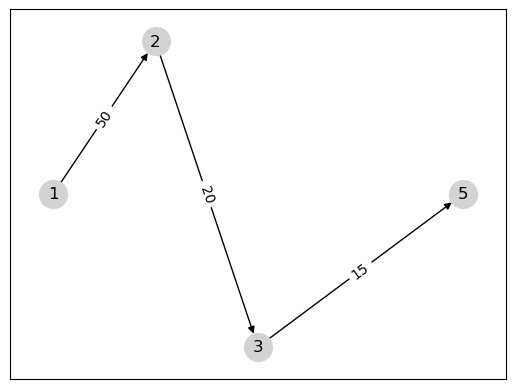

In [22]:
G1=nx.DiGraph()
G1.add_weighted_edges_from(weight)
elbs1={(u,v):G[u][v]['weight'] for (u,v) in G1.edges()}
nx.draw_networkx(G1,pos=P,node_color='lightgray',node_size=400)
nx.draw_networkx_edge_labels(weight,pos=P,edge_labels=elbs1)

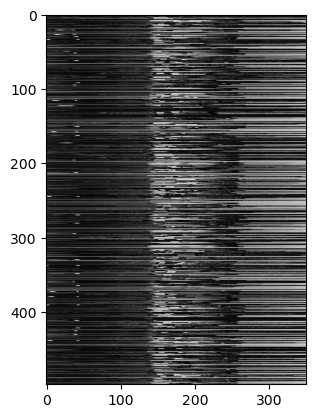

In [17]:
p1=r'C:\Users\84280\Desktop\lianxi\tsp\picture1.npy'
p2=r'C:\Users\84280\Desktop\lianxi\tsp\picture2.npy'
p3=r'C:\Users\84280\Desktop\lianxi\tsp\picture3.npy'
ar=np.load(p1)

plt.imshow(ar,cmap='gray')

In [18]:
ar

array([[ 53,  39,  38, ..., 176, 177, 180],
       [ 35,  21,  18, ...,  39,  49,  65],
       [ 36,  22,  18, ...,  23,  21,  28],
       ...,
       [ 45,  33,  32, ..., 173, 175, 181],
       [ 71,  62,  62, ..., 176, 181, 189],
       [ 36,  24,  24, ..., 160, 163, 166]])

In [19]:
weight_list=[]
for i in range(498):
    for j in range(i+1,498):
        d=np.sum(np.power((ar[i]-ar[j]),2))
        weight_list.append((i,j,d))
len(weight_list)

123753

In [20]:
picd=[[0]*498 for _ in range(498)]   

In [21]:
for (i,j,w) in weight_list:
    picd[i][j]=w
    picd[j][i]=w

In [22]:
ptour= tsp.find_tour(picd)
len(ptour)


498

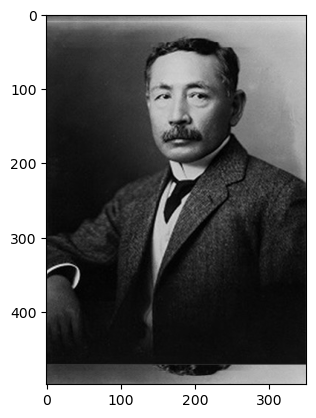

In [23]:
res=[ar[ptour[i]] for i in range(497,-1,-1)]
plt.imshow(res,cmap='gray')

In [24]:
def imshow(ar,a):
    
    ### please 
    m=ar.shape[0]
    weight_list=[]
    for i in range(m):
        for j in range(i+1,m):
            d=np.sum(np.power((ar[i]-ar[j]),2))
            weight_list.append((i,j,d))
    picd=[[0]*m for _ in range(m)]
    for (i,j,w) in weight_list:
        picd[i][j]=w
        picd[j][i]=w
    ptour= tsp.find_tour(picd)

    if a==-1:
        res=[ar[ptour[i]] for i in range(m-1,-1,-1)]
        plt.imshow(res,cmap='gray')
    elif a==1:
        print('upsidedown')
        res=[ar[ptour[i]] for i in range(m)]
        plt.imshow(res,cmap='gray')

In [26]:
ar2=np.load(p2)
ar3=np.load(p3)
ar2.shape,ar3.shape

((253, 199), (245, 206))

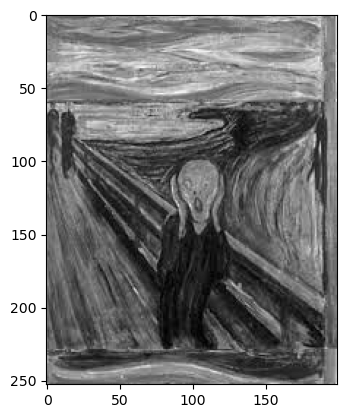

In [32]:
imshow(ar2,-1)

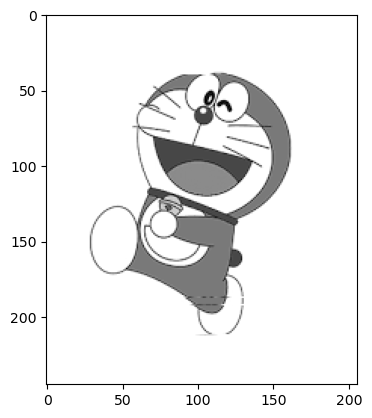

In [41]:
imshow(ar3,-1)

### 距離計算の考え方
普通に距離と言えば、絶対値と$(a-b)^2$のルートの考え方が多いです、この場合では、絶対値の処理方ではややこしくなりますので、二乗の方法だったら、Numpyを使えば空間内の距離を簡単に計算できる
短冊の座標をベクトル　$a$にしよう、任意の短冊 $b$の距離は下記に書き換える：計算の近さを考えるため、ルートは無視します
$$(a-b)(a-b).T$$ 